#### ARIMA 

Auto Regressive Integrated Moving Average

AR - Auto Regressive -

    -   The auto regressive component involves in predicting the future values based on the past values
    -   It assumes that the future values are a Linear combination of past observation
    -   The first parameter (p) represents the order of this auto regressive component , including how many past observations are considered 

I - Integrated -

    -   This uses differnecing in the data points to make our data stationary to apply the model in it.
    -   This is represented by the second parameter d , indicate how many times we need  to perform differencing to achieve stationarity

MA - Moving Average -

    -   The average component  , for a given fixed duration , and reducing the residuals to ensure stationarity 
    -   This helps in capturing short term fluctuation
    -   This parameter is denoted with the term q.

In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 

In [70]:
np.random.seed(42)
date_range = pd.date_range(start='2022-01-01',periods=100,freq = 'B')
data = {'Date':date_range , 'Price':np.cumsum(np.random.normal(size=100))}
df = pd.DataFrame(data)
df.set_index('Date',inplace=True)

In [71]:
df.head(10)

,Price
Date,
2022-01-03,0.496714
2022-01-04,0.358450
2022-01-05,1.006138
2022-01-06,2.529168
2022-01-07,2.295015
2022-01-10,2.060878
2022-01-11,3.640091
2022-01-12,4.407525
2022-01-13,3.938051


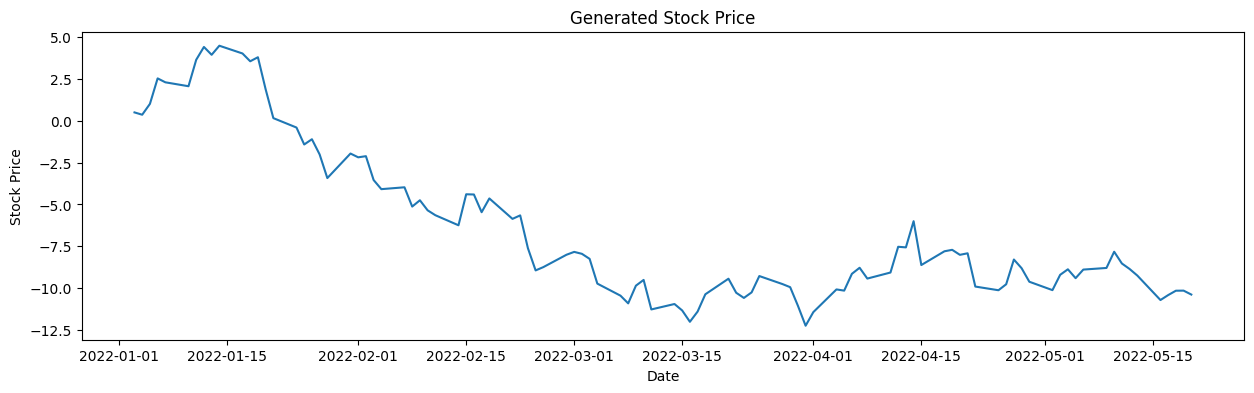

In [72]:
plt.figure(figsize=(15,4))
plt.plot(df['Price'])
plt.title('Generated Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [73]:
model = ARIMA(df['Price'],order=(1,0,1))
result = model.fit()

c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [74]:
future_steps = 10 
future_dates = pd.date_range(start=df.index[-1]+pd.DateOffset(days=1),periods=future_steps,freq='B')
print(future_dates)

DatetimeIndex(['2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03'],
              dtype='datetime64[ns]', freq='B')


In [75]:
predictions = result.predict(start=len(df),end=len(df)+future_steps -1 ,typ = 'levels')

In [76]:
predictions

2022-05-23   -10.305287
2022-05-24   -10.226544
2022-05-25   -10.149123
2022-05-26   -10.073003
2022-05-27    -9.998161
2022-05-30    -9.924577
2022-05-31    -9.852228
2022-06-01    -9.781095
2022-06-02    -9.711156
2022-06-03    -9.642392
Freq: B, Name: predicted_mean, dtype: float64

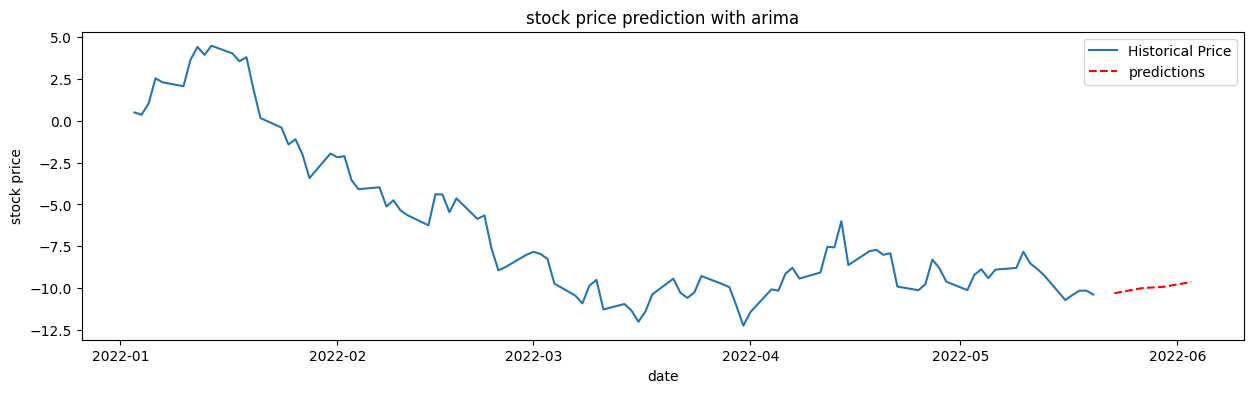

In [77]:
plt.figure(figsize=(15,4))
plt.plot(df["Price"],label = 'Historical Price')
plt.plot (future_dates,predictions,label = 'predictions' , linestyle = 'dashed',color = 'red')
plt.title('stock price prediction with arima')
plt.xlabel('date')
plt.ylabel('stock price')
plt.legend()
plt.show()